<a href="https://colab.research.google.com/github/vishnu-meera/ipynb-files/blob/main/parametric_expirements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipython-input-330176492.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


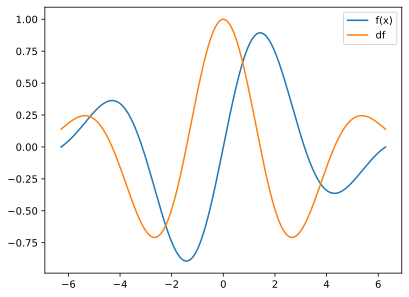

In [9]:
x = np.linspace(-2*np.pi, 2*np.pi, 401)
fx = np.sin(x) * np.exp(-x**2*.05)

df = np.cos(x)*np.exp(-x**2*.05) + np.sin(x) * (-.1*x)*np.exp(-x**2*.05)

plt.plot(x,fx,x,df)
plt.legend(['f(x)','df'])

In [10]:
def fx(x):
  return np.sin(x) * np.exp(-x**2*.05)

def deriv(x):
  return np.cos(x)*np.exp(-x**2*.05) + np.sin(x) * (-.1*x)*np.exp(-x**2*.05)

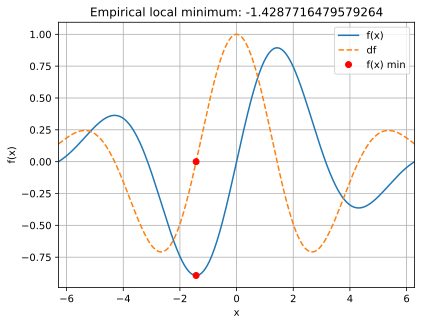

-1.4287716479579264


In [32]:
#random starting point


localmin = np.random.choice(x,1)
learning_rate = .01
training_epochs = 1000

for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate * grad


plt.plot(x, fx(x), x, deriv(x), '--')
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()
print(localmin[0])

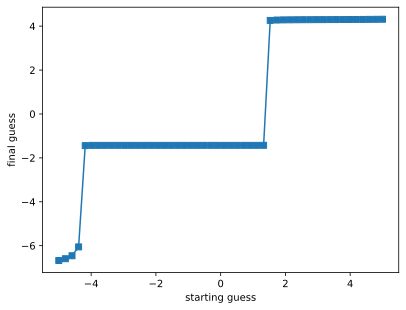

In [35]:
#parametric expirements starting

#experiment 1: systemtically varying the starting localtions

startlocs = np.linspace(-5,5,50)
finalres = np.zeros(len(startlocs))
learning_rate = .01
training_epochs = 1000

for idx, localmin in enumerate(startlocs):
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate * grad

  finalres[idx] = localmin

plt.plot(startlocs,finalres,'s-')
plt.xlabel('starting guess')
plt.ylabel('final guess')
plt.show()



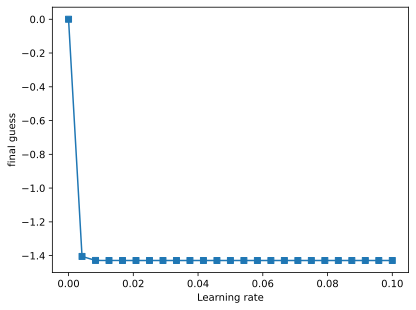

In [48]:
#expiremnt 2: systematicatly vary the learning rate

learningrates = np.linspace(1e-10,1e-1,25)
finalres = np.zeros(len(learningrates))
training_epochs = 1000

for idx, learning_rate in enumerate(learningrates):
  localmin = 0 #force to guess 0
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate * grad

  finalres[idx] = localmin

plt.plot(learningrates,finalres,'s-')
plt.xlabel('Learning rate')
plt.ylabel('final guess')
plt.show()

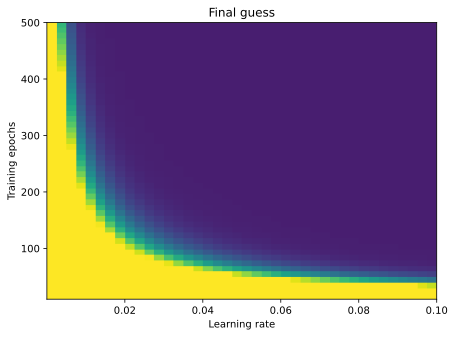

In [74]:
#expiremnt 3: interaction between learning rate and epochs

learningrates = np.linspace(1e-10,1e-1,50)
training_epochs = np.round(np.linspace(10,500,40))
finalres = np.zeros((len(learningrates),len(training_epochs)))

for Lidx, learning_rate in enumerate(learningrates):
  for Eidx, training_epoch in enumerate(training_epochs):
    localmin = 0#force to guess 0, for 1.6 remove vmin and vmax
    for i in range(int(training_epoch)):
      grad = deriv(localmin)
      localmin = localmin - learning_rate * grad
    finalres[Lidx, Eidx] = localmin


fig, ax = plt.subplots(figsize=(7,5))
plt.imshow(finalres, extent=[learningrates[0], learningrates[-1],training_epochs[0], training_epochs[-1]],
           aspect='auto',origin='lower',vmin=-1.45,vmax=-1.2)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final guess')
plt.show()